In [97]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, roc_auc_score

In [98]:
data = pd.read_csv(r"C:\Users\Neel Arora\Downloads\The_Cancer_data_1500_V2.csv")
data

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1


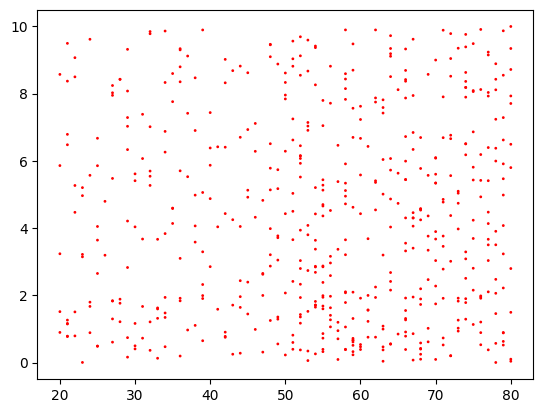

In [99]:
plt.scatter(data.Age,data.PhysicalActivity,data.Diagnosis,marker='o',color='red')

In [100]:
data.shape

(1500, 9)

In [101]:
from sklearn.model_selection import train_test_split

X = data[['Age', 'PhysicalActivity']]   
y = data['Diagnosis']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [102]:
X_train

,Age,PhysicalActivity
1467,55,8.205764
212,76,1.204818
59,23,0.819384
855,39,6.433697
534,77,7.395632
...,...,...
22,21,9.492812
226,58,5.908663
566,69,1.018473
1057,53,0.669911


In [103]:
X_test

,Age,PhysicalActivity
1017,51,6.009572
801,31,0.717353
719,29,2.322897
298,53,2.736664
1426,48,3.982502
...,...,...
1310,56,1.971060
1193,77,9.055821
1377,23,3.677085
457,72,8.076259


In [104]:
y_train

1467    0
212     1
59      0
855     0
534     0
       ..
22      1
226     1
566     1
1057    0
299     0
Name: Diagnosis, Length: 1350, dtype: int64

In [105]:
y_test

1017    0
801     0
719     0
298     1
1426    1
       ..
1310    1
1193    0
1377    0
457     0
1300    0
Name: Diagnosis, Length: 150, dtype: int64

In [106]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [107]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [108]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [109]:
model.score(X_test, y_test)

0.6066666666666667

In [110]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

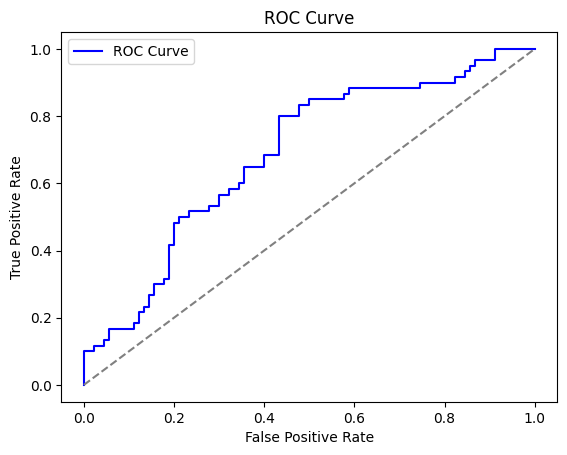

In [111]:
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [112]:
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)

AUC Score: 0.6859259259259259
